In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("vgsales.csv")

## 가설
1. 나라별로 선호하는 플랫폼과 게임 장르 및 퍼블리셔가 다를 것이다
2. 북미 판매량이 세계 판매량과 가장 밀접한 관계가 있을 것이다
3. 각 시기별 인기있는 퍼블리셔와 장르가 다를 것
4. 위의 가설들을 바탕으로 게임 어느 지역에서 더 많이 판매될 것인가를 예측할 수 있을 것이다

In [3]:
data

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


### 데이터 설명
- vgchartz.com 기준 100,000장 이상 팔린 게임들의 판매량 및 세부 데이터
  - Rank : 가장 많이 팔린 순위
  - Name : 게임의 제목
  - Platform : 게임이 발매된 플랫폼 e.g)pc, ps4, ...
  - Year : 게임이 발매된 해
  - Genre : 게임의 장르
  - Publisher : 게임의 퍼블리셔
  - NA,EU,JP_sales : 미국, 유럽, 일본 각각 지역의 판매량 (in million)
  - Other_sales : 미국, 유럽, 일본을 제외한 지역의 판매량 (in million)
  - Global_sales : 전 세계 판매량 (in million)

In [4]:
best_region = []

In [5]:
sales = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]
for i in range(len(data)):
    if data[sales].iloc[i].max() == data["NA_Sales"].iloc[i]:
        best_region.append("NA")
    elif data[sales].iloc[i].max() == data["EU_Sales"].iloc[i]:
        best_region.append("EU")
    elif data[sales].iloc[i].max() == data["JP_Sales"].iloc[i]:
        best_region.append("JP")
    else:
        best_region.append("Other")

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data, best_region, test_size=0.3, random_state=14)

In [7]:
X_train.isnull().sum()

Rank              0
Name              0
Platform          0
Year            193
Genre             0
Publisher        46
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [8]:
X_train.Genre.value_counts()

Action          2329
Sports          1608
Misc            1204
Role-Playing    1072
Shooter          944
Adventure        892
Racing           877
Platform         619
Simulation       608
Fighting         581
Strategy         483
Puzzle           401
Name: Genre, dtype: int64

In [9]:
genr_dict = {G:idx for idx, G in enumerate(X_train.Genre.value_counts().keys())}

In [10]:
genr_dict_str = {v:k for k, v in genr_dict.items()}

In [11]:
genr_dict

{'Action': 0,
 'Sports': 1,
 'Misc': 2,
 'Role-Playing': 3,
 'Shooter': 4,
 'Adventure': 5,
 'Racing': 6,
 'Platform': 7,
 'Simulation': 8,
 'Fighting': 9,
 'Strategy': 10,
 'Puzzle': 11}

In [12]:
genr_dict_str

{0: 'Action',
 1: 'Sports',
 2: 'Misc',
 3: 'Role-Playing',
 4: 'Shooter',
 5: 'Adventure',
 6: 'Racing',
 7: 'Platform',
 8: 'Simulation',
 9: 'Fighting',
 10: 'Strategy',
 11: 'Puzzle'}

In [13]:
X_train.Platform.value_counts()

DS      1489
PS2     1472
PS3      963
Wii      950
X360     881
PSP      875
PS       842
PC       679
GBA      583
XB       576
GC       383
3DS      349
PSV      285
PS4      237
N64      225
SNES     170
XOne     143
SAT      114
WiiU     102
2600      87
GB        73
NES       68
DC        32
GEN       21
NG         7
WS         4
SCD        3
3DO        2
PCFX       1
GG         1
TG16       1
Name: Platform, dtype: int64

In [14]:
plat_dict = {p:idx for idx, p in enumerate(X_train.Platform.value_counts().keys())}

In [15]:
plat_dict

{'DS': 0,
 'PS2': 1,
 'PS3': 2,
 'Wii': 3,
 'X360': 4,
 'PSP': 5,
 'PS': 6,
 'PC': 7,
 'GBA': 8,
 'XB': 9,
 'GC': 10,
 '3DS': 11,
 'PSV': 12,
 'PS4': 13,
 'N64': 14,
 'SNES': 15,
 'XOne': 16,
 'SAT': 17,
 'WiiU': 18,
 '2600': 19,
 'GB': 20,
 'NES': 21,
 'DC': 22,
 'GEN': 23,
 'NG': 24,
 'WS': 25,
 'SCD': 26,
 '3DO': 27,
 'PCFX': 28,
 'GG': 29,
 'TG16': 30}

In [16]:
plat_dict_str = {v:k for k, v in plat_dict.items()}

In [17]:
plat_dict_str

{0: 'DS',
 1: 'PS2',
 2: 'PS3',
 3: 'Wii',
 4: 'X360',
 5: 'PSP',
 6: 'PS',
 7: 'PC',
 8: 'GBA',
 9: 'XB',
 10: 'GC',
 11: '3DS',
 12: 'PSV',
 13: 'PS4',
 14: 'N64',
 15: 'SNES',
 16: 'XOne',
 17: 'SAT',
 18: 'WiiU',
 19: '2600',
 20: 'GB',
 21: 'NES',
 22: 'DC',
 23: 'GEN',
 24: 'NG',
 25: 'WS',
 26: 'SCD',
 27: '3DO',
 28: 'PCFX',
 29: 'GG',
 30: 'TG16'}

In [18]:
X_train.Publisher.value_counts()

Electronic Arts                 953
Ubisoft                         662
Activision                      660
Namco Bandai Games              625
Konami Digital Entertainment    586
                               ... 
Misawa                            1
Pioneer LDC                       1
Tigervision                       1
CTO SpA                           1
Revolution Software               1
Name: Publisher, Length: 513, dtype: int64

In [19]:
pub_dict = {p:(idx if idx <= 30 else 30) for idx, p in enumerate(X_train.Publisher.value_counts().keys())}

In [20]:
pub_dict

{'Electronic Arts': 0,
 'Ubisoft': 1,
 'Activision': 2,
 'Namco Bandai Games': 3,
 'Konami Digital Entertainment': 4,
 'Sony Computer Entertainment': 5,
 'THQ': 6,
 'Nintendo': 7,
 'Sega': 8,
 'Take-Two Interactive': 9,
 'Capcom': 10,
 'Atari': 11,
 'Tecmo Koei': 12,
 'Warner Bros. Interactive Entertainment': 13,
 'Square Enix': 14,
 'Unknown': 15,
 'Disney Interactive Studios': 16,
 'Eidos Interactive': 17,
 'Midway Games': 18,
 '505 Games': 19,
 'Microsoft Game Studios': 20,
 'D3Publisher': 21,
 'Acclaim Entertainment': 22,
 'Vivendi Games': 23,
 'Codemasters': 24,
 'Deep Silver': 25,
 'Idea Factory': 26,
 'Zoo Digital Publishing': 27,
 'Nippon Ichi Software': 28,
 'Hudson Soft': 29,
 'LucasArts': 30,
 'Majesco Entertainment': 30,
 'Rising Star Games': 30,
 'Bethesda Softworks': 30,
 '5pb': 30,
 'Atlus': 30,
 'Crave Entertainment': 30,
 'Banpresto': 30,
 'Ignition Entertainment': 30,
 'Empire Interactive': 30,
 'Infogrames': 30,
 'Focus Home Interactive': 30,
 'Virgin Interactive': 3

In [21]:
pub_dict_str = {v:(k if v < 30 else "Other") for k, v in pub_dict.items()}

In [22]:
pub_dict_str

{0: 'Electronic Arts',
 1: 'Ubisoft',
 2: 'Activision',
 3: 'Namco Bandai Games',
 4: 'Konami Digital Entertainment',
 5: 'Sony Computer Entertainment',
 6: 'THQ',
 7: 'Nintendo',
 8: 'Sega',
 9: 'Take-Two Interactive',
 10: 'Capcom',
 11: 'Atari',
 12: 'Tecmo Koei',
 13: 'Warner Bros. Interactive Entertainment',
 14: 'Square Enix',
 15: 'Unknown',
 16: 'Disney Interactive Studios',
 17: 'Eidos Interactive',
 18: 'Midway Games',
 19: '505 Games',
 20: 'Microsoft Game Studios',
 21: 'D3Publisher',
 22: 'Acclaim Entertainment',
 23: 'Vivendi Games',
 24: 'Codemasters',
 25: 'Deep Silver',
 26: 'Idea Factory',
 27: 'Zoo Digital Publishing',
 28: 'Nippon Ichi Software',
 29: 'Hudson Soft',
 30: 'Other'}

In [23]:
df_num = X_train.replace(genr_dict)
df_num.Publisher = df_num.Publisher.replace(pub_dict)
df_num.Platform = df_num.Platform.replace(plat_dict)

In [24]:
df_num

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9837,9839,Gungnir: Mayari no Gunshin to Eiyuu Sensou,5,2011.0,3,30.0,0.07,0.00,0.04,0.01,0.12
12334,12336,Famicom Mini: Balloon Fight,8,2004.0,0,7.0,0.00,0.00,0.06,0.00,0.06
14412,14415,Mother Goose no Himitsu no Yakata,5,2011.0,5,30.0,0.00,0.00,0.03,0.00,0.03
531,532,Dragon Quest V: Tenkuu no Hanayome,15,1992.0,3,30.0,0.00,0.00,2.78,0.01,2.79
8089,8091,Jampack Vol. 1,6,1996.0,2,5.0,0.10,0.07,0.00,0.01,0.18
...,...,...,...,...,...,...,...,...,...,...,...
1232,1234,NASCAR 98,6,1996.0,6,0.0,1.43,0.05,0.00,0.04,1.52
13034,13036,Doraemon: Nobita no Kyouryuu 2006 DS,0,2006.0,3,8.0,0.00,0.00,0.05,0.00,0.05
12025,12027,AMF Bowling Pinbusters!,0,2008.0,1,30.0,0.06,0.00,0.00,0.00,0.07
9484,9486,Rango: The Video Game,4,2011.0,0,0.0,0.06,0.06,0.00,0.01,0.13


In [25]:
df_num.corr()

,Rank,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,1.000000,-0.037216,0.174860,0.084906,0.344048,-0.450279,-0.412288,-0.261929,-0.332200,-0.469386
Platform,-0.037216,1.000000,-0.292375,0.007817,0.015866,0.037093,-0.010747,0.149951,-0.069335,0.038727
Year,0.174860,-0.292375,1.000000,-0.128614,-0.027864,-0.098695,0.009376,-0.175809,0.041160,-0.080219
Genre,0.084906,0.007817,-0.128614,1.000000,0.110218,-0.023834,-0.028435,0.028299,-0.042102,-0.021163
Publisher,0.344048,0.015866,-0.027864,0.110218,1.000000,-0.143417,-0.140987,-0.052289,-0.122797,-0.148249
NA_Sales,-0.450279,0.037093,-0.098695,-0.023834,-0.143417,1.000000,0.744439,0.406502,0.592440,0.928381
EU_Sales,-0.412288,-0.010747,0.009376,-0.028435,-0.140987,0.744439,1.000000,0.433385,0.646636,0.895115
JP_Sales,-0.261929,0.149951,-0.175809,0.028299,-0.052289,0.406502,0.433385,1.000000,0.248113,0.603330
Other_Sales,-0.332200,-0.069335,0.041160,-0.042102,-0.122797,0.592440,0.646636,0.248113,1.000000,0.707637
Global_Sales,-0.469386,0.038727,-0.080219,-0.021163,-0.148249,0.928381,0.895115,0.603330,0.707637,1.000000


### correlation을 통해 알게된 정보
- 유럽과 북미는 매우 강한 선형관계를 갖는 것에 비해 일본은 비교적 약한 선형관계를 갖고있음
- 일본의 경우는 발매 플랫폼에 따른 판매량의 선형관계가 보이는 반면 나머지 국가들은 퍼블리셔에 따른 선형관계가 보임

### 가설 2 : 북미 판매량이 세계 판매량과 가장 밀접한 관계가 있을 것이다
- correlation을 통해 북미의 판매량과 세계 판매량이 약 0.94의 상관계수를 갖는 것으로 가장 강한 선형관계를 보이고 있음
- 따라서 다른 지역에 비해 북미의 판매량이 세계의 판매량과 연관성이 높음

## 퍼블리셔별

In [26]:
df_pub = df_num.copy()

In [27]:
df_pub.Publisher = df_pub.Publisher.replace(pub_dict_str)

In [28]:
df_pub

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9837,9839,Gungnir: Mayari no Gunshin to Eiyuu Sensou,5,2011.0,3,Other,0.07,0.00,0.04,0.01,0.12
12334,12336,Famicom Mini: Balloon Fight,8,2004.0,0,Nintendo,0.00,0.00,0.06,0.00,0.06
14412,14415,Mother Goose no Himitsu no Yakata,5,2011.0,5,Other,0.00,0.00,0.03,0.00,0.03
531,532,Dragon Quest V: Tenkuu no Hanayome,15,1992.0,3,Other,0.00,0.00,2.78,0.01,2.79
8089,8091,Jampack Vol. 1,6,1996.0,2,Sony Computer Entertainment,0.10,0.07,0.00,0.01,0.18
...,...,...,...,...,...,...,...,...,...,...,...
1232,1234,NASCAR 98,6,1996.0,6,Electronic Arts,1.43,0.05,0.00,0.04,1.52
13034,13036,Doraemon: Nobita no Kyouryuu 2006 DS,0,2006.0,3,Sega,0.00,0.00,0.05,0.00,0.05
12025,12027,AMF Bowling Pinbusters!,0,2008.0,1,Other,0.06,0.00,0.00,0.00,0.07
9484,9486,Rango: The Video Game,4,2011.0,0,Electronic Arts,0.06,0.06,0.00,0.01,0.13


In [29]:
df_pub_mean = df_pub.groupby("Publisher").mean()

In [30]:
df_pub_mean

,Rank,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,,,
505 Games,9794.161765,2.750000,2008.470588,4.904412,0.172279,0.089853,0.011544,0.029265,0.304044
Acclaim Entertainment,8181.663866,8.310924,1999.924370,4.445378,0.217899,0.080504,0.007731,0.015882,0.322521
Activision,6543.204545,5.395455,2007.317972,2.736364,0.413985,0.221985,0.006939,0.076167,0.719455
Atari,8236.250996,6.569721,2002.600823,4.605578,0.270837,0.074183,0.032988,0.025538,0.404622
Capcom,7866.775665,6.802281,2005.899614,3.650190,0.197300,0.102624,0.198897,0.038403,0.537529
Codemasters,9166.186916,4.850467,2008.019048,4.822430,0.073551,0.157103,0.003925,0.038505,0.273832
D3Publisher,11545.225806,3.580645,2009.161290,3.387097,0.068226,0.030565,0.027258,0.012500,0.138710
Deep Silver,10425.793478,5.195652,2011.076087,4.380435,0.095326,0.068043,0.008261,0.022935,0.194457
Disney Interactive Studios,5742.120000,3.913333,2008.925676,2.600000,0.330467,0.168067,0.001867,0.057200,0.558600


In [31]:
sales = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "Global_Sales"]

In [32]:
mean_sales_by_pub = df_pub_mean[sales].sort_values("Global_Sales", ascending=False)

In [33]:
mean_sales_by_pub

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,1.006680,0.525622,0.609523,0.112033,2.253859
Microsoft Game Studios,0.912121,0.392879,0.015909,0.109621,1.430455
Take-Two Interactive,0.553746,0.301237,0.015866,0.152191,1.022862
Sony Computer Entertainment,0.398492,0.281587,0.115714,0.123909,0.919861
Electronic Arts,0.454502,0.268510,0.010609,0.093694,0.827366
Activision,0.413985,0.221985,0.006939,0.076167,0.719455
Warner Bros. Interactive Entertainment,0.366412,0.244176,0.004588,0.081588,0.696765
Disney Interactive Studios,0.330467,0.168067,0.001867,0.057200,0.558600
Ubisoft,0.285514,0.193233,0.008776,0.059230,0.547009


In [34]:
pub_plot = df_num.groupby("Publisher").mean()[sales]

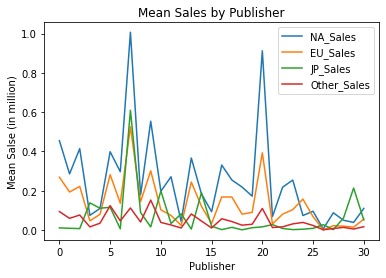

In [35]:
for s in pub_plot.drop("Global_Sales", axis=1).columns:
    plt.title("Mean Sales by Publisher")
    plt.plot(pub_plot.index, pub_plot[s], label=s)
    plt.legend()
plt.xlabel('Publisher')
plt.ylabel("Mean Salse (in million)")
plt.show()

### 가설 1 : 나라별로 선호하는 플랫폼과 게임 장르 및 퍼블리셔가 다를 것이다
- 위의 그래프와 표는 각 퍼블리셔의 지역별 판매량을 평균낸 것
- 이를 통해서 북미와 유럽은 선호하는 퍼블리셔가 대체로 동일하고 일본의 경우는 선호하는 퍼블리셔가 다름을 알 수 있음
  - 북미와 유럽은 EA 나 Activision 등의 게임을 많이 소비하지만 일본은 그렇지 않고 오히려 자국의 게임을 더 많이 소비함

## 장르별

In [36]:
df_gen = df_num.copy()

In [37]:
df_gen.Genre = df_pub.Genre.replace(genr_dict_str)

In [38]:
df_gen

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
9837,9839,Gungnir: Mayari no Gunshin to Eiyuu Sensou,5,2011.0,Role-Playing,30.0,0.07,0.00,0.04,0.01,0.12
12334,12336,Famicom Mini: Balloon Fight,8,2004.0,Action,7.0,0.00,0.00,0.06,0.00,0.06
14412,14415,Mother Goose no Himitsu no Yakata,5,2011.0,Adventure,30.0,0.00,0.00,0.03,0.00,0.03
531,532,Dragon Quest V: Tenkuu no Hanayome,15,1992.0,Role-Playing,30.0,0.00,0.00,2.78,0.01,2.79
8089,8091,Jampack Vol. 1,6,1996.0,Misc,5.0,0.10,0.07,0.00,0.01,0.18
...,...,...,...,...,...,...,...,...,...,...,...
1232,1234,NASCAR 98,6,1996.0,Racing,0.0,1.43,0.05,0.00,0.04,1.52
13034,13036,Doraemon: Nobita no Kyouryuu 2006 DS,0,2006.0,Role-Playing,8.0,0.00,0.00,0.05,0.00,0.05
12025,12027,AMF Bowling Pinbusters!,0,2008.0,Sports,30.0,0.06,0.00,0.00,0.00,0.07
9484,9486,Rango: The Video Game,4,2011.0,Action,0.0,0.06,0.06,0.00,0.01,0.13


In [39]:
df_gen_mean = df_gen.groupby("Genre").mean()

In [40]:
df_gen_mean

,Rank,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,,,,,
Action,7968.397596,5.950193,2007.901704,12.432200,0.270434,0.161417,0.046119,0.059618,0.537789
Adventure,11547.982063,4.950673,2008.169875,20.074324,0.089955,0.051536,0.041334,0.013666,0.196637
Fighting,7807.864028,6.549053,2004.503509,14.547496,0.260017,0.114785,0.108227,0.043098,0.526007
Misc,8559.104651,4.243355,2007.373109,14.556684,0.221520,0.112500,0.061653,0.039834,0.435797
Platform,7043.696284,7.494346,2003.782324,11.589951,0.458239,0.216721,0.129225,0.054071,0.858643
Puzzle,9817.239401,5.084788,2005.428934,19.112219,0.153666,0.079227,0.088628,0.019327,0.341671
Racing,7947.223489,5.803877,2004.967366,14.922374,0.294914,0.198723,0.046043,0.066956,0.606956
Role-Playing,8117.725746,6.255597,2006.936792,17.137255,0.201996,0.123545,0.229170,0.037799,0.592584
Shooter,7393.830508,6.294492,2005.845820,13.144374,0.428676,0.232023,0.028210,0.076261,0.765572


In [41]:
df_gen_mean[sales].sort_values("Global_Sales", ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
Platform,0.458239,0.216721,0.129225,0.054071,0.858643
Shooter,0.428676,0.232023,0.028210,0.076261,0.765572
Racing,0.294914,0.198723,0.046043,0.066956,0.606956
Role-Playing,0.201996,0.123545,0.229170,0.037799,0.592584
Sports,0.292991,0.160386,0.058800,0.054235,0.566660
Action,0.270434,0.161417,0.046119,0.059618,0.537789
Fighting,0.260017,0.114785,0.108227,0.043098,0.526007
Simulation,0.216118,0.127730,0.068059,0.036003,0.448158
Misc,0.221520,0.112500,0.061653,0.039834,0.435797


In [42]:
gen_plot = df_num.groupby("Genre").mean()[sales]

In [43]:
gen_plot

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Genre,,,,,
0,0.270434,0.161417,0.046119,0.059618,0.537789
1,0.292991,0.160386,0.058800,0.054235,0.566660
2,0.221520,0.112500,0.061653,0.039834,0.435797
3,0.201996,0.123545,0.229170,0.037799,0.592584
4,0.428676,0.232023,0.028210,0.076261,0.765572
5,0.089955,0.051536,0.041334,0.013666,0.196637
6,0.294914,0.198723,0.046043,0.066956,0.606956
7,0.458239,0.216721,0.129225,0.054071,0.858643
8,0.216118,0.127730,0.068059,0.036003,0.448158


NA_Sales
EU_Sales
JP_Sales
Other_Sales


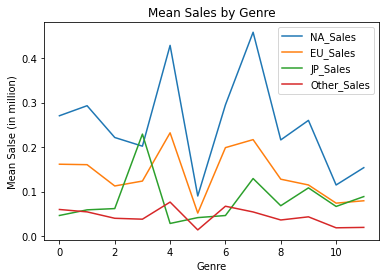

In [44]:
for s in gen_plot.drop("Global_Sales", axis=1).columns:
    plt.title("Mean Sales by Genre")
    plt.plot(gen_plot.index, gen_plot[s], label=s)
    print(s)
    plt.legend()
plt.xlabel('Genre')
plt.ylabel("Mean Salse (in million)")
plt.show()

In [45]:
genr_dict

{'Action': 0,
 'Sports': 1,
 'Misc': 2,
 'Role-Playing': 3,
 'Shooter': 4,
 'Adventure': 5,
 'Racing': 6,
 'Platform': 7,
 'Simulation': 8,
 'Fighting': 9,
 'Strategy': 10,
 'Puzzle': 11}

### 가설 1 : 나라별로 선호하는 플랫폼과 게임 장르 및 퍼블리셔가 다를 것이다
- 위의 그래프와 표는 각 장르의 지역별 판매량을 평균낸 것
- 이를 통해서 북미와 유럽은 선호하는 장르가 대체로 동일하고 일본의 경우는 선호하는 장르가 다름을 알 수 있음
  - 일본이 다른 지역보다 RPG에 대한 선호도가 굉장히 높음 반면 슈팅게임의 경우 일본의 선호도가 낮고 다른 지역의 선호도가 높음

### 플랫폼별

In [46]:
df_plat = df_num.copy()

In [47]:
df_plat.Platform = df_plat.Platform.replace(plat_dict_str)

In [48]:
df_plat_mean = df_plat.groupby("Platform").mean()

In [49]:
df_plat_mean

,Rank,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,,,,,
2600,4625.425287,1982.168831,2.839080,16.402299,0.589655,0.035862,0.000000,0.005517,0.631954
3DO,14059.500000,1995.000000,6.500000,17.000000,0.000000,0.000000,0.040000,0.000000,0.040000
3DS,9107.260745,2013.069767,3.137536,13.813218,0.123037,0.094785,0.184384,0.019742,0.422063
DC,8397.625000,2000.062500,4.562500,11.718750,0.153438,0.045312,0.166250,0.007188,0.372812
DS,9744.965077,2008.184228,4.568838,15.309764,0.171961,0.084876,0.074359,0.026521,0.358059
GB,3745.876712,1996.277778,5.465753,10.575342,1.041781,0.529041,0.882055,0.073973,2.526575
GBA,8847.198971,2003.265625,3.958834,13.139037,0.211715,0.081852,0.054837,0.008491,0.357513
GC,8821.605744,2003.341398,3.971279,10.864230,0.234648,0.066841,0.033760,0.008930,0.345222
GEN,7629.857143,1992.904762,4.904762,11.809524,0.665238,0.186190,0.090476,0.028571,0.970476


In [50]:
df_plat_mean[sales].sort_values("Global_Sales", ascending=False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
GB,1.041781,0.529041,0.882055,0.073973,2.526575
NES,1.221471,0.213824,0.980294,0.059706,2.475441
GEN,0.665238,0.186190,0.090476,0.028571,0.970476
PS4,0.311350,0.402743,0.044177,0.136371,0.894430
SNES,0.230235,0.069588,0.473294,0.012706,0.785706
X360,0.465426,0.220204,0.010238,0.066617,0.762736
PS3,0.306812,0.264341,0.060955,0.109543,0.741599
XOne,0.412378,0.234406,0.001818,0.059720,0.707832
N64,0.441556,0.131956,0.109244,0.014622,0.698000


In [51]:
plat_plot = df_num.groupby("Platform").mean()[sales]

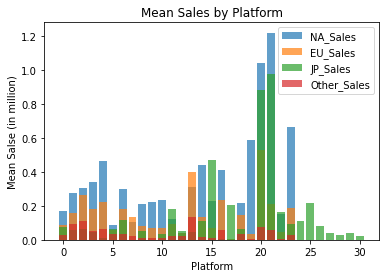

In [52]:
for s in plat_plot.drop("Global_Sales", axis=1).columns:
    plt.title("Mean Sales by Platform")
    plt.bar(plat_plot.index, plat_plot[s], label=s, alpha=0.7)
    plt.legend()
plt.xlabel('Platform')
plt.ylabel("Mean Salse (in million)")
plt.show()

### 가설 1 : 나라별로 선호하는 플랫폼과 게임 장르 및 퍼블리셔가 다를 것이다
- 위의 그래프와 표는 각 플랫폼의 지역별 판매량을 평균낸 것
- 이를 통해서 북미와 유럽 그리고 일본이 선호하는 플랫폼에 차이가 있는 것을 볼 수 있음
  - 일본은 다른 지역에 비해 Xbox 시리즈를 선호하지 않는 반면 유럽의 경우 다른 지역들 보다 PC에 대한 선호도가 높음

In [53]:
df_num.Year.unique()

array([2011., 2004., 1992., 1996., 2008., 2007., 2001., 2005., 2012.,
       2010., 1998., 2016., 2000., 2015., 2013., 2002., 2006., 1982.,
       1990.,   nan, 2009., 2014., 1997., 2003., 1999., 1995., 1991.,
       1983., 1994., 1981., 1985., 1989., 1993., 1988., 1987., 1984.,
       2017., 1980., 1986., 2020.])

### 연도별 

In [54]:
df_year = df_num.copy()

In [55]:
years = sorted(df_year.Year.unique())

In [56]:
years

[1980.0,
 1981.0,
 1982.0,
 1983.0,
 1984.0,
 1985.0,
 1986.0,
 1987.0,
 1988.0,
 1989.0,
 1990.0,
 1991.0,
 1992.0,
 1993.0,
 1994.0,
 1995.0,
 1996.0,
 1997.0,
 1998.0,
 1999.0,
 2000.0,
 2001.0,
 2002.0,
 2003.0,
 2004.0,
 2005.0,
 2006.0,
 2007.0,
 2008.0,
 2009.0,
 2010.0,
 2011.0,
 2012.0,
 2013.0,
 2014.0,
 2015.0,
 2016.0,
 nan,
 2017.0,
 2020.0]

In [57]:
test_year = df_year.loc[df_year.Year == 1983.0]
test_year

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
4267,4269,Gremlins,19,1983.0,0,11.0,0.43,0.03,0.00,0.00,0.46
6007,6009,Dolphin,19,1983.0,0,2.0,0.27,0.02,0.00,0.00,0.29
4096,4098,Millipede,19,1983.0,4,11.0,0.45,0.03,0.00,0.01,0.48
2672,2674,Crystal Castles,19,1983.0,0,11.0,0.72,0.04,0.00,0.01,0.77
2652,2654,Jr. Pac-Man,19,1983.0,11,11.0,0.72,0.05,0.00,0.01,0.78
5559,5561,Frogger II: Threeedeep!,19,1983.0,0,30.0,0.31,0.02,0.00,0.00,0.33
5382,5384,Frostbite,19,1983.0,0,2.0,0.32,0.02,0.00,0.00,0.34
763,765,Mahjong,21,1983.0,2,7.0,0.01,0.00,2.13,0.00,2.14
8457,8459,Mr. Do!'s Castle,19,1983.0,0,30.0,0.15,0.01,0.00,0.00,0.17
1809,1811,Donkey Kong,21,1983.0,7,7.0,0.23,0.05,0.84,0.01,1.13


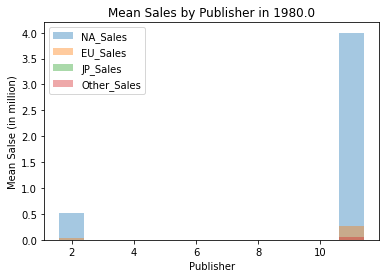

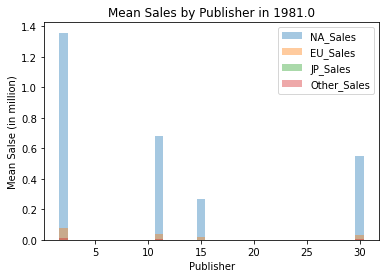

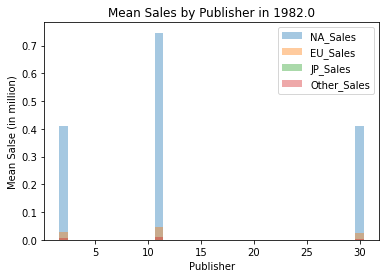

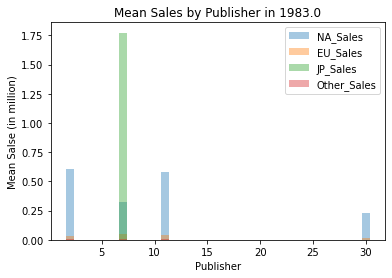

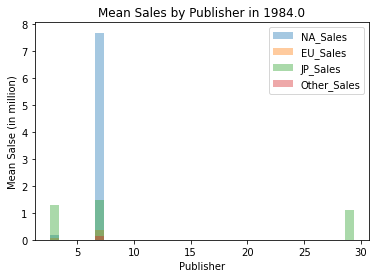

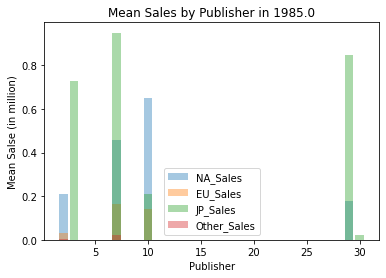

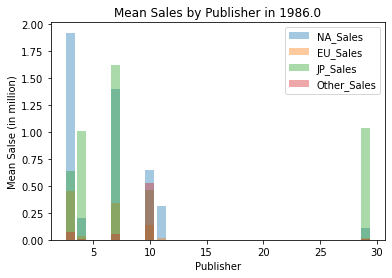

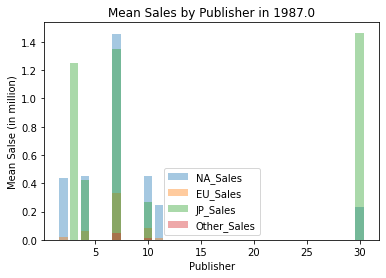

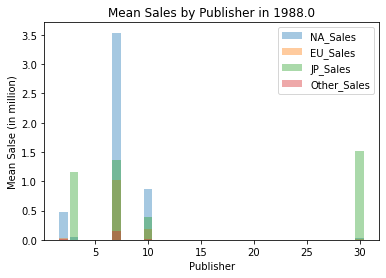

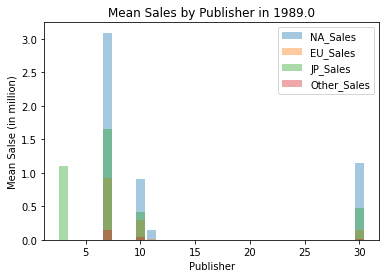

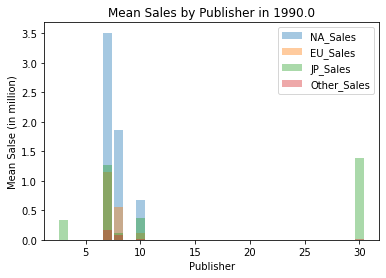

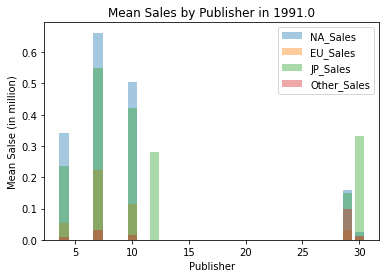

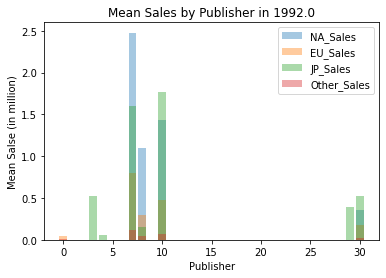

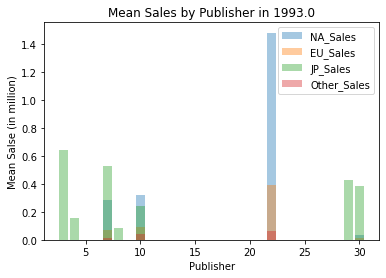

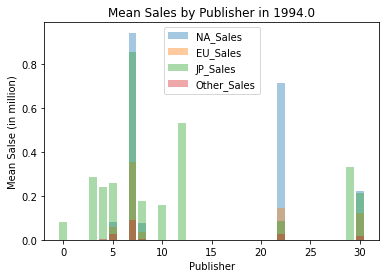

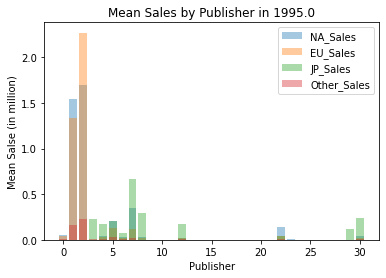

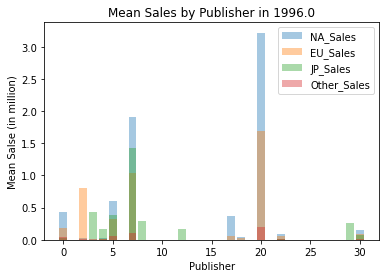

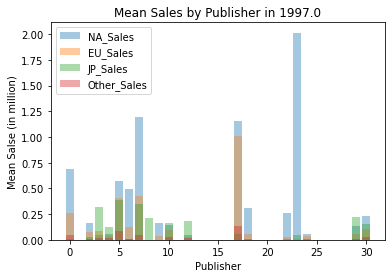

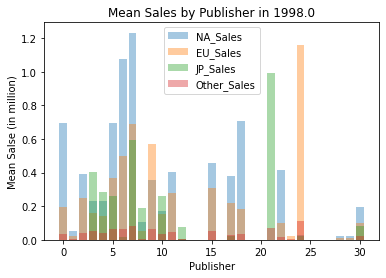

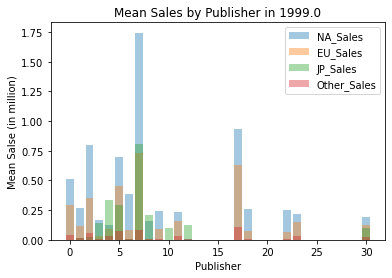

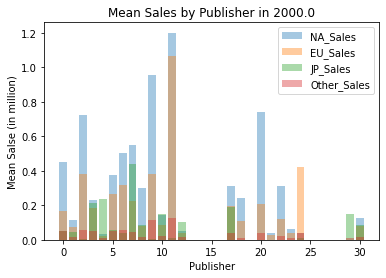

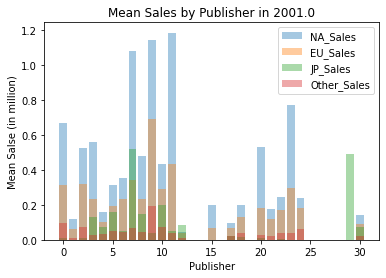

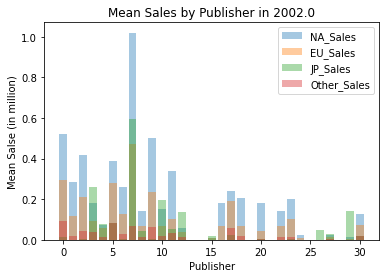

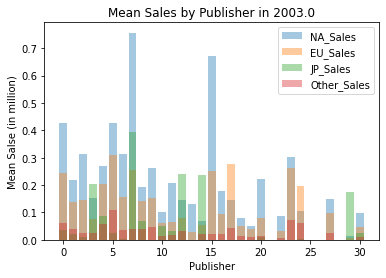

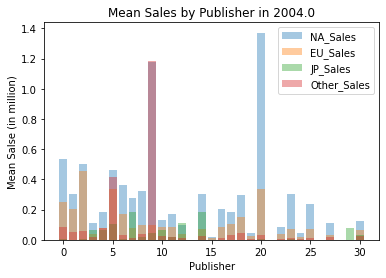

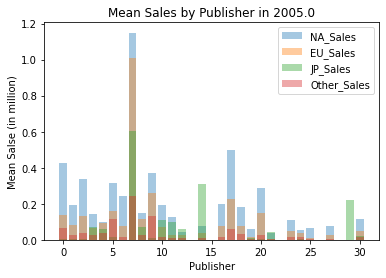

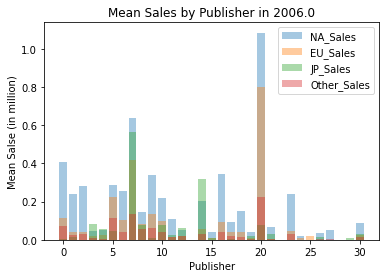

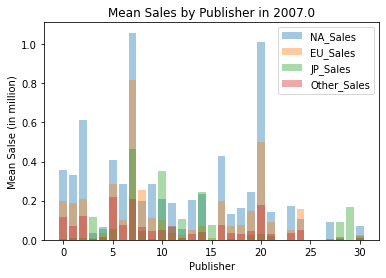

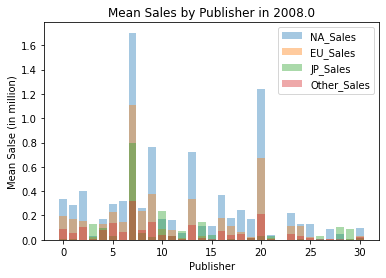

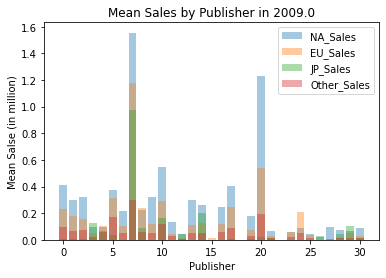

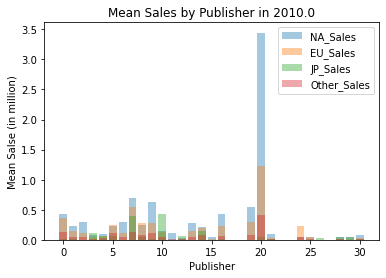

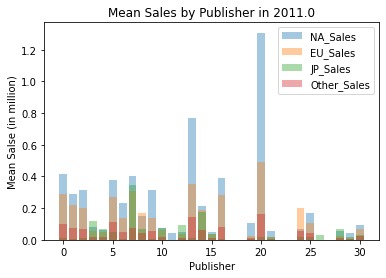

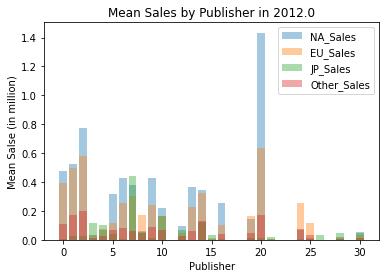

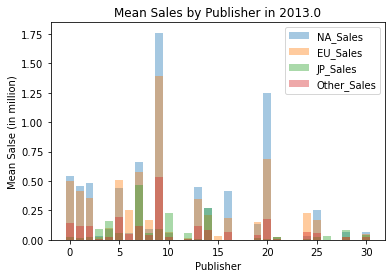

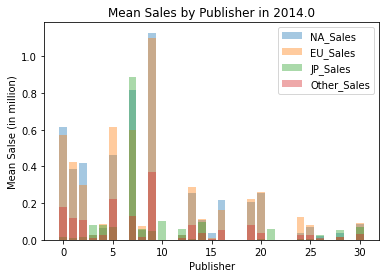

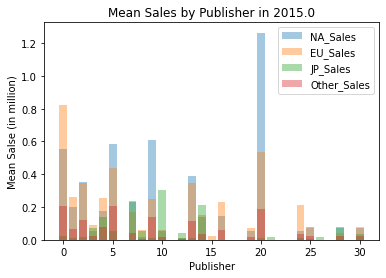

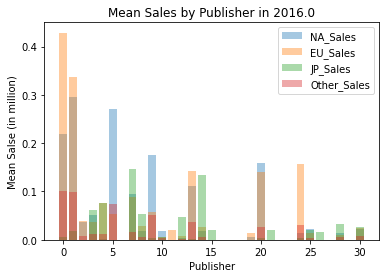

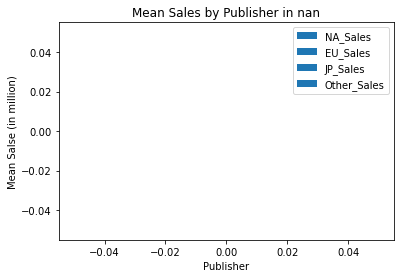

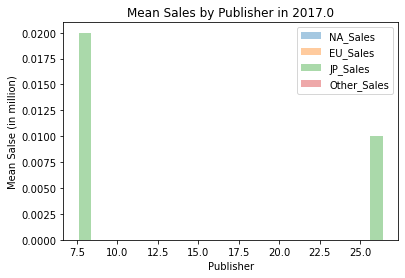

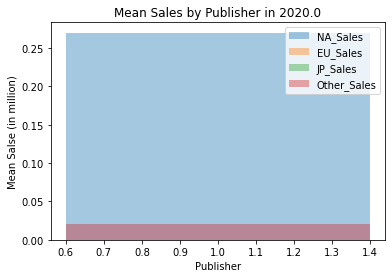

In [58]:
for y in years:
    df_yplot = df_year.loc[df_year.Year == y]
    ypub_plot = df_yplot.groupby("Publisher").mean()[sales]
    for s in ypub_plot.drop("Global_Sales", axis=1).columns:
        plt.title(f"Mean Sales by Publisher in {y}")
        plt.bar(ypub_plot.index, ypub_plot[s], label=s, alpha=0.4)
        plt.legend()
    plt.xlabel('Publisher')
    plt.ylabel("Mean Salse (in million)")
    plt.show()

In [61]:
test_year = df_year.loc[df_year.Year == 2016.0]

In [62]:
test_year.groupby("Publisher").mean()[sales]

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
0.0,0.218667,0.428667,0.005333,0.101333,0.752000
1.0,0.296154,0.336923,0.018462,0.098462,0.750769
2.0,0.037500,0.038750,0.000000,0.008750,0.086250
3.0,0.050833,0.036667,0.062083,0.012500,0.162083
4.0,0.001667,0.076667,0.076667,0.011667,0.168333
5.0,0.270000,0.053333,0.000000,0.073333,0.396667
7.0,0.094286,0.088571,0.147143,0.017143,0.350000
8.0,0.018000,0.028000,0.054000,0.006000,0.108000
9.0,0.175000,0.058333,0.003333,0.051667,0.288333


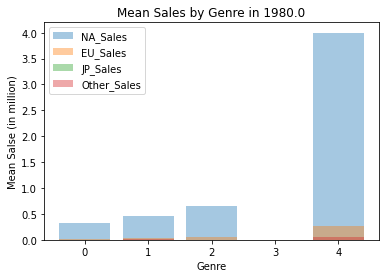

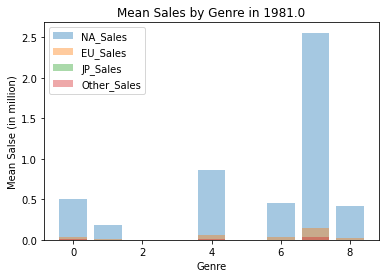

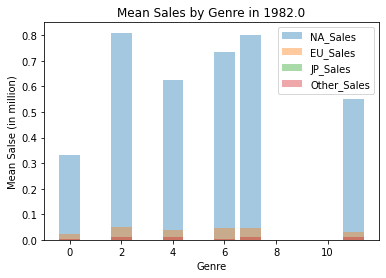

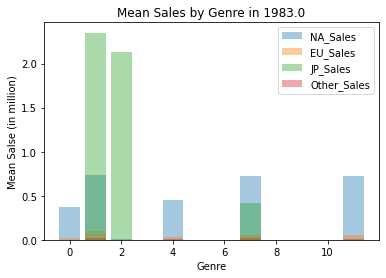

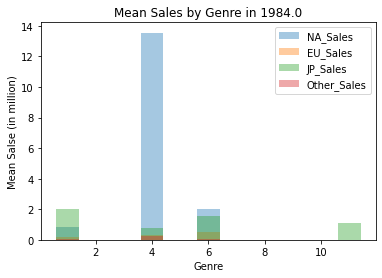

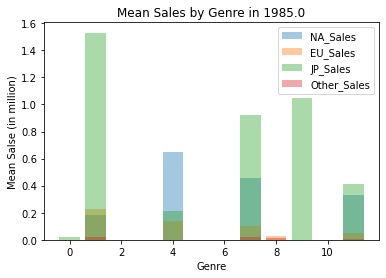

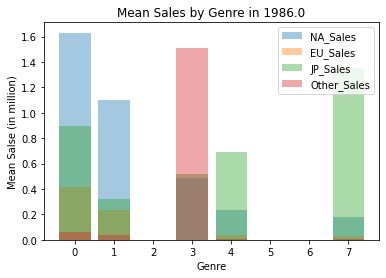

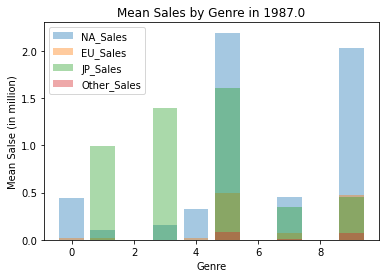

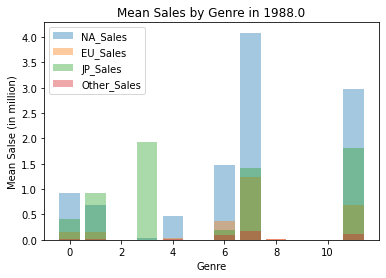

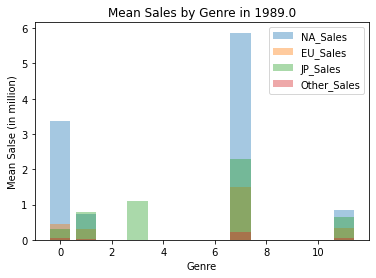

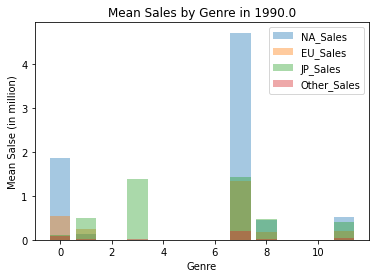

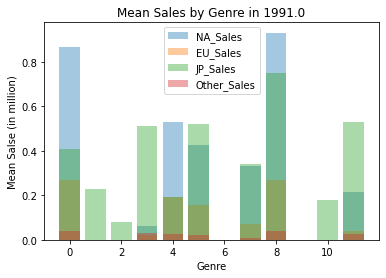

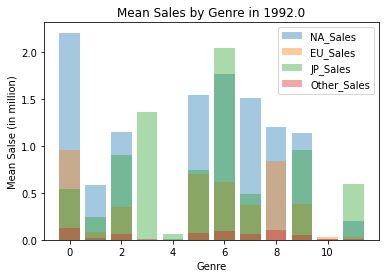

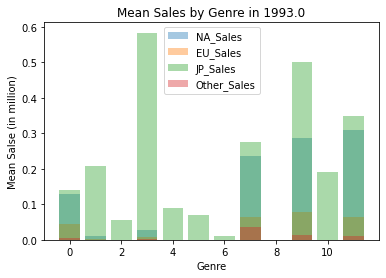

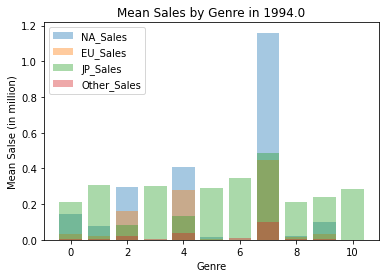

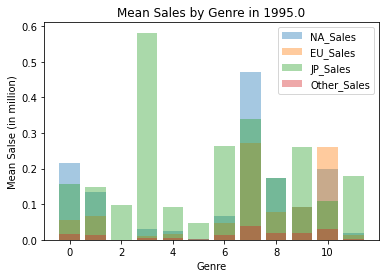

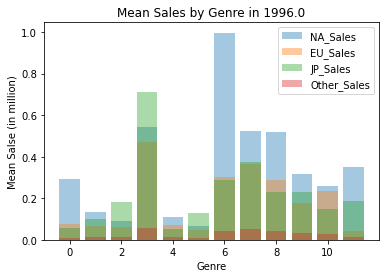

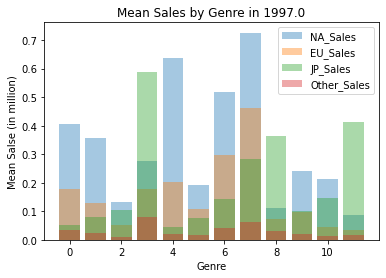

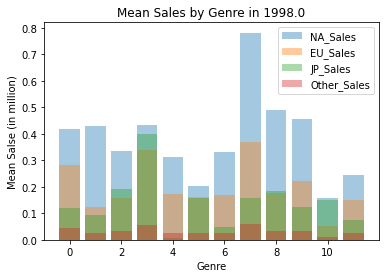

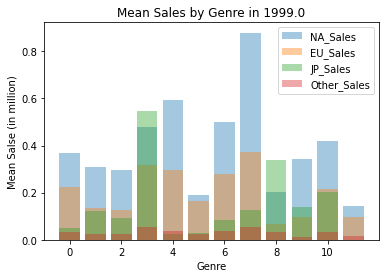

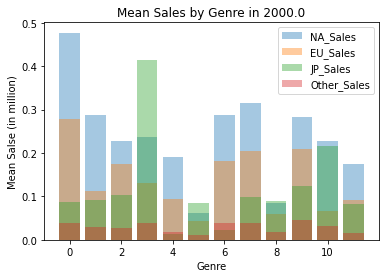

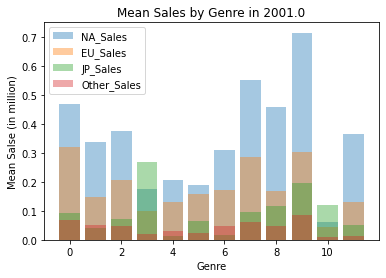

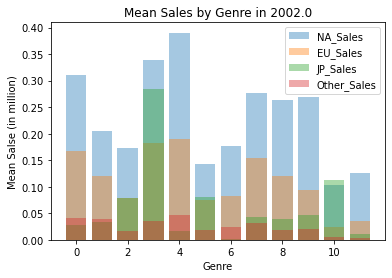

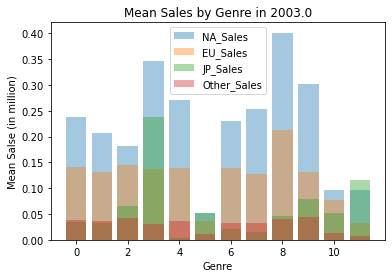

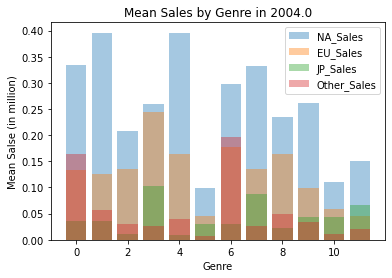

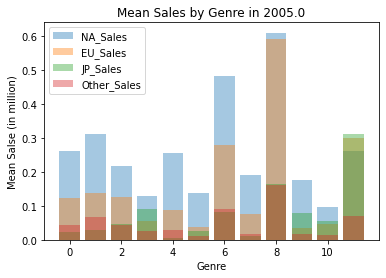

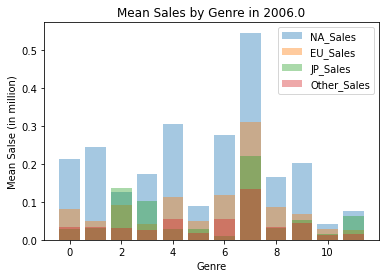

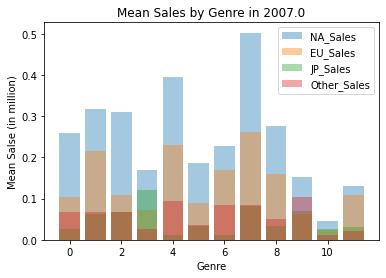

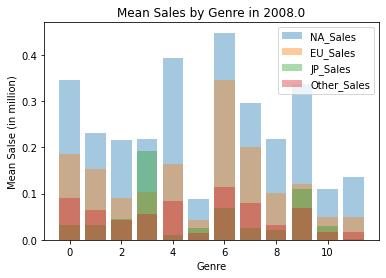

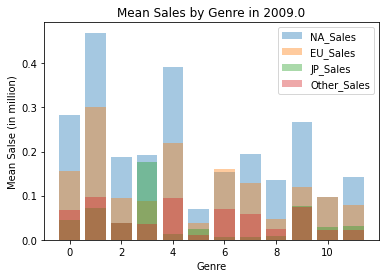

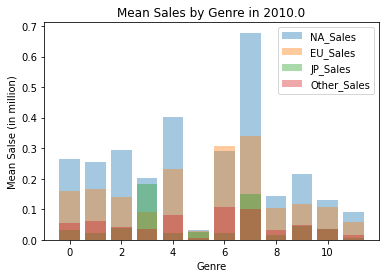

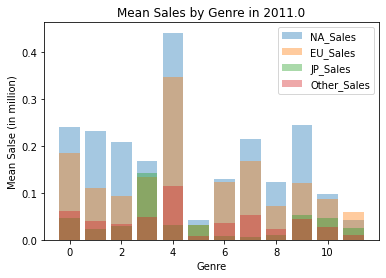

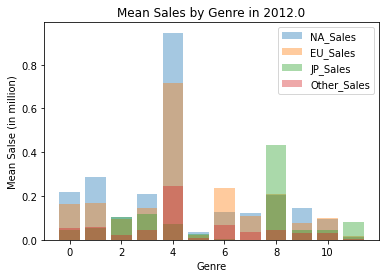

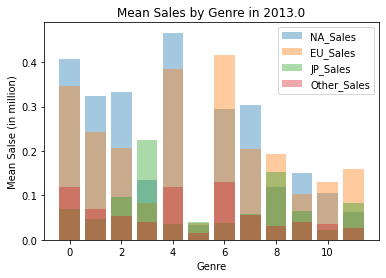

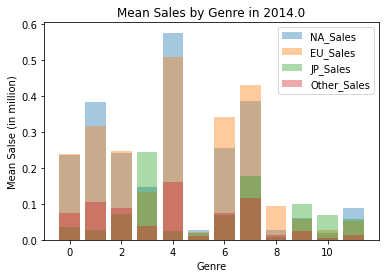

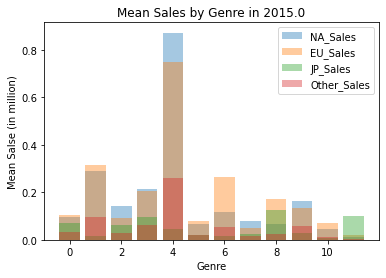

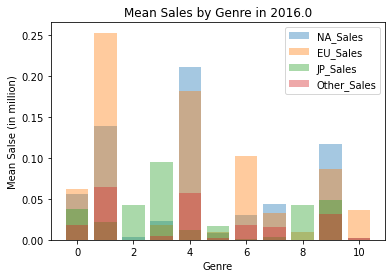

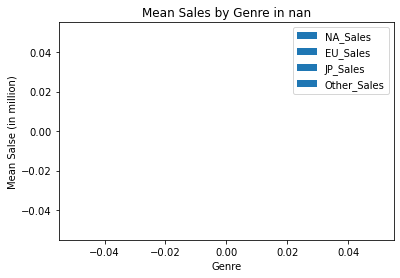

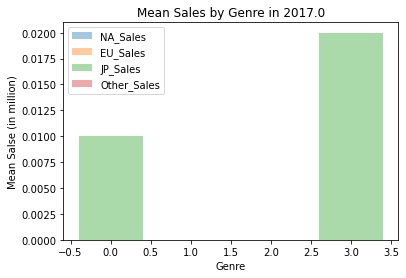

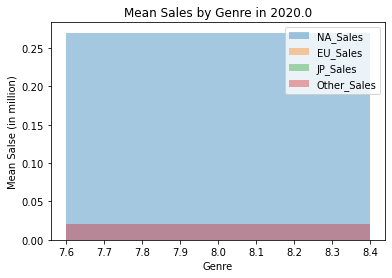

In [63]:
for y in years:
    df_yplot = df_year.loc[df_year.Year == y]
    ygen_plot = df_yplot.groupby("Genre").mean()[sales]
    for s in ygen_plot.drop("Global_Sales", axis=1).columns:
        plt.title(f"Mean Sales by Genre in {y}")
        plt.bar(ygen_plot.index, ygen_plot[s], label=s, alpha=0.4)
        plt.legend()
    plt.xlabel('Genre')
    plt.ylabel("Mean Salse (in million)")
    plt.show()

### 가설 3 : 각 시기별 인기있는 퍼블리셔와 장르가 다를 것
- 위의 그래프들은 각 연도별 그래프로 각각 장르와 퍼블리셔의 평균량을 보야주는 그래프임
  - 이를 통해 연도별로 발매된 게임의 평균 판매량이 다르고 또 국가별 선호도도 다름을 알 수 있음

## 아쉬운점
- 가설 4번에 대한 검증을 하지 못함
- 그래프를 좀 더 직관적으로 표현할 수 있었을 것 같음